### How are in demand skills trending for Data Analysts

Steps
1. Aggregate the Skill counts Monthly
2. Re-analyze based on percentage of total jobs
3. Results

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
from datasets import load_dataset
from adjustText import adjust_text

In [2]:
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df.job_posted_date = pd.to_datetime(df.job_posted_date)
df.job_skills = df.job_skills.apply(lambda x : ast.literal_eval(x) if pd.notna(x) else (x))

In [3]:
df_us_da = df[(df.job_country == 'United States') & (df.job_title_short == 'Data Analyst')].copy()

In [4]:
df_us_da['job_posted_month_no'] = df.job_posted_date.dt.month

In [5]:
df_us_da_explode = df_us_da.explode('job_skills')

In [6]:
df_us_da_pivot =  df_us_da_explode.pivot_table(index='job_posted_month_no' , columns='job_skills' , aggfunc='size' , fill_value=0)

In [7]:
df_us_da_pivot.loc['Total'] = df_us_da_pivot.sum()

In [8]:
df_us_da_pivot = df_us_da_pivot[df_us_da_pivot.loc['Total'].sort_values(ascending=False).index]


In [9]:
df_us_da_pivot = df_us_da_pivot.drop('Total')
df_us_da_pivot

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,capacitor,chainer,asp.net core,qt,microsoft lists,msaccess,kotlin,openstack,theano,xamarin
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,4601,3592,2488,2254,1832,1513,1337,968,972,718,...,1,0,0,0,0,0,0,0,0,0
2,3168,2587,1676,1618,1212,1045,1122,738,705,514,...,0,0,0,0,0,0,0,0,0,0
3,3226,2661,1804,1683,1238,1141,1054,736,669,418,...,0,0,0,0,0,0,0,0,0,1
4,3220,2549,1789,1679,1302,1038,1057,695,650,439,...,0,0,0,0,0,0,0,0,0,0
5,2581,2118,1432,1349,972,867,860,557,515,358,...,0,0,0,0,0,1,0,0,0,0
6,2862,2382,1628,1609,984,1017,989,721,624,414,...,0,0,0,1,0,0,1,1,0,0
7,2609,2118,1533,1438,996,881,881,587,549,401,...,0,0,0,0,0,0,0,0,0,0
8,3414,2731,1951,2025,1276,1271,1208,752,746,484,...,0,0,0,0,0,0,0,0,0,0
9,2295,1801,1353,1229,856,746,820,478,475,359,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df_totals = df_us_da.groupby('job_posted_month_no').size()
df_totals

job_posted_month_no
1     8494
2     6124
3     6218
4     6049
5     4993
6     5683
7     5201
8     6634
9     4639
10    5271
11    4531
12    3979
dtype: int64

In [11]:
df_da_us_perc = df_us_da_pivot.div(df_totals/100 , axis=0)

In [12]:
df_da_us_perc.reset_index(inplace=True)

In [13]:
df_da_us_perc['job_posted_month'] = df_da_us_perc['job_posted_month_no'].apply(lambda x : pd.to_datetime(x , format='%m').strftime('%b'))
df_da_us_perc.set_index('job_posted_month' , inplace=True)

In [32]:
df_da_us_perc.drop(columns='job_posted_month_no' , inplace=True)

([Text(11.289276713709679, 47.1841775256232, 'sql'),
  Text(11.075819052419357, 39.066560033791085, 'excel'),
  Text(10.882182459677422, 29.1715984447018, 'tableau'),
  Text(10.891330645161291, 27.10995639365778, 'python'),
  Text(11.235912298387099, 20.34326272290895, 'sas')],
 [])

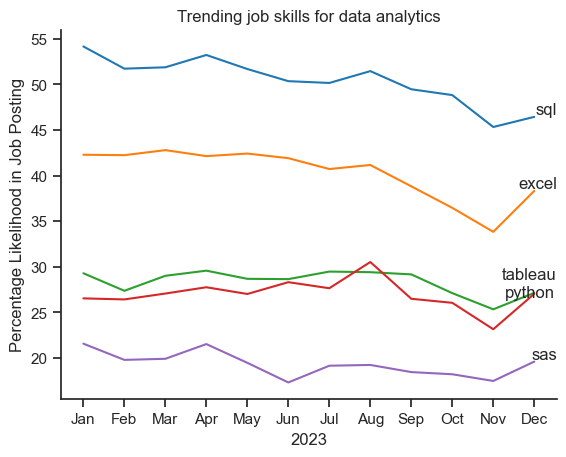

In [36]:
df_plot = df_da_us_perc.iloc[: , :5]
sns.lineplot(data=df_plot , dashes=False , palette='tab10' , legend=False)
sns.set_theme(style='ticks')
sns.despine()
plt.xlabel('2023')
plt.ylabel('Percentage Likelihood in Job Posting')
plt.title('Trending job skills for data analytics')

texts = []
for i in range(5):
    texts.append(
        plt.text(
            12,
            df_plot.iloc[-1, i],
            df_plot.columns[i]
        )
    )

adjust_text(texts)